In [1]:
import datetime
import importlib
import matplotlib.pyplot as plt
import numpy
from pathlib import Path
import rasterio
from rasterio.plot import show as rio_show
import xarray as xr

import moad_tools.midoss.random_oil_spills as ros

%matplotlib inline

In [2]:
importlib.reload(ros)

<module 'moad_tools.midoss.random_oil_spills' from '/Users/sallen/Documents/MIDOSS/moad_tools/moad_tools/midoss/random_oil_spills.py'>

In [20]:
random_seed = 101
random_generator = numpy.random.default_rng(random_seed)

In [16]:
geotiffs_dir = Path('/Users/sallen/Documents/MIDOSS/ShipTrackDensityGeoTIFFs/')
spill_date_hour = datetime.datetime(2015, 9, 11, 13)
dataset = rasterio.open(geotiffs_dir / f"all_2018_{spill_date_hour.month:02.0f}.tif")

In [17]:
mesh = xr.open_dataset('/Users/sallen/Documents/MEOPAR/grid/mesh_mask201702.nc')

In [18]:
watermask = numpy.load('gifmesh.npy')

48.192264556884766 -123.41216278076172 281 473 7.7146745
48.85030746459961 -123.05535888671875 237 497 8.250972
48.22787094116211 -123.74916076660156 279 451 9.837744
48.12992477416992 -123.43057250976562 285 472 50.48799
48.44931411743164 -122.96807098388672 264 503 1.6171553
50.3343620300293 -125.4255142211914 139 339 13.6485195
48.88280487060547 -123.30116271972656 235 481 26.81064
48.7255744934082 -122.51237487792969 246 533 119.27002
49.04998016357422 -123.25282287597656 224 484 0.40582165
49.309959411621094 -123.16914367675781 207 489 36.488113


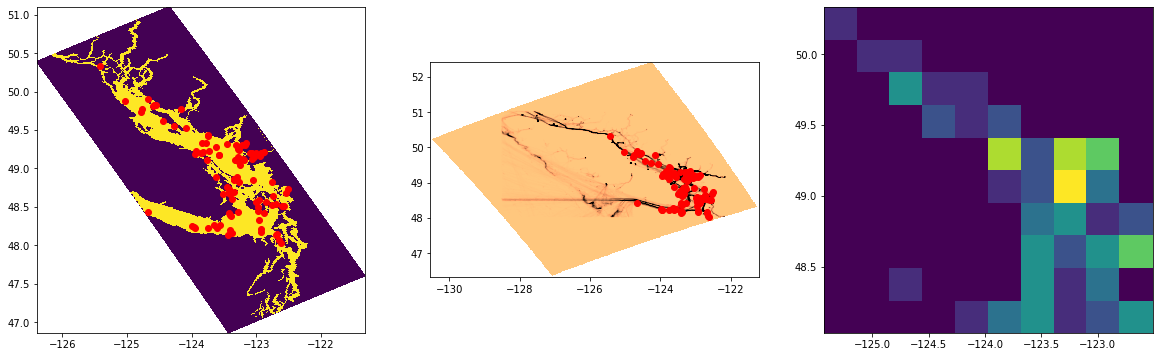

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].pcolormesh(mesh.glamt[0], mesh.gphit[0], mesh.tmask[0, 0])
rio_show(dataset, ax=axs[1], cmap='copper_r', vmax=5);
npoints = 100
lat = numpy.zeros(npoints)
lon = numpy.zeros_like(lat)
for ii in range(npoints):
    lat[ii], lon[ii], x_index, y_index, data_out = ros.get_lat_lon_indices(
            geotiffs_dir,
            spill_date_hour.month,
            watermask,
            mesh,
            random_generator=random_generator,
        )
    if ii < 10:
        print(lat[ii], lon[ii], x_index, y_index, data_out)
    for ax in axs[:-1]:
        ax.scatter(lon[ii], lat[ii], color='r')
    axs[2].hist2d(lon, lat)